In [37]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [53]:
# Build the Sequential feedforward neural network model

model = Sequential()
model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(16,activation='relu',name = 'layer_1'),         
        Dense(16,activation='relu',name = 'layer_2' ),
        Dense(10,activation='softmax')         
                    ])

In [54]:
# Print the model summary

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 layer_2 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [132]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3), activation='relu',input_shape=(28,28,1)), #,data_format='channels_last')
    MaxPooling2D((3,3)), #,data_format='channels_last')
    Flatten(),
    Dense(10, activation='softmax')
])


In [133]:
# Print the model summary

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [134]:
# Define the model optimizer, loss function and metrics
opt= tf.keras.optimizers.Adam(learning_rate=0.05)
acc= tf.keras.metrics.SparseCategoricalAccuracy()
mae= tf.keras.metrics.MeanAbsoluteError()
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics= [acc,mae]
    
    )


In [135]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.05>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [136]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [137]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [138]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [139]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [140]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

In [144]:
train_images.shape

(60000, 28, 28)

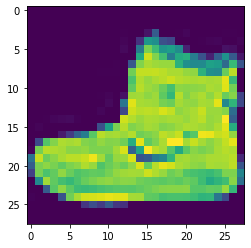

labels: Ankle boot


In [141]:
# Display one of the images
i =0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"labels: {labels[train_labels[i]]}")

#### Fit the model

In [152]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8,batch_size=256,verbose=2)

Epoch 1/8
235/235 - 4s - loss: 0.4957 - sparse_categorical_accuracy: 0.8167 - mean_absolute_error: 4.4200 - 4s/epoch - 17ms/step
Epoch 2/8
235/235 - 4s - loss: 0.4786 - sparse_categorical_accuracy: 0.8229 - mean_absolute_error: 4.4200 - 4s/epoch - 15ms/step
Epoch 3/8
235/235 - 4s - loss: 0.4703 - sparse_categorical_accuracy: 0.8252 - mean_absolute_error: 4.4200 - 4s/epoch - 15ms/step
Epoch 4/8
235/235 - 4s - loss: 0.4664 - sparse_categorical_accuracy: 0.8260 - mean_absolute_error: 4.4200 - 4s/epoch - 15ms/step
Epoch 5/8
235/235 - 4s - loss: 0.4638 - sparse_categorical_accuracy: 0.8272 - mean_absolute_error: 4.4200 - 4s/epoch - 15ms/step
Epoch 6/8
235/235 - 4s - loss: 0.4642 - sparse_categorical_accuracy: 0.8273 - mean_absolute_error: 4.4200 - 4s/epoch - 15ms/step
Epoch 7/8
235/235 - 3s - loss: 0.4638 - sparse_categorical_accuracy: 0.8274 - mean_absolute_error: 4.4200 - 3s/epoch - 15ms/step
Epoch 8/8
235/235 - 3s - loss: 0.4654 - sparse_categorical_accuracy: 0.8261 - mean_absolute_error

#### Plot training history

In [153]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.495663,0.816700,4.420000
1,0.478638,0.822883,4.420002
2,0.470281,0.825150,4.420001
3,0.466445,0.825950,4.420000
4,0.463834,0.827233,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

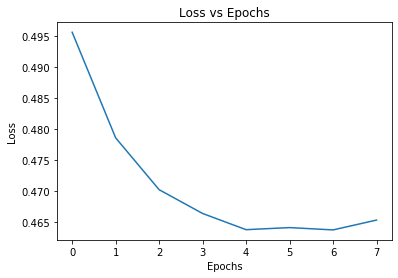

In [154]:
# Make a plot for the loss
loss_plot = df.plot(y="loss",title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")


In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [155]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [158]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels)


313/313 [==============================] - 2s 6ms/step - loss: 0.5124 - sparse_categorical_accuracy: 0.8118 - mean_absolute_error: 4.4200


#### Make predictions from the model

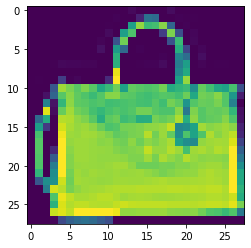

Label: Bag


In [160]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx = 30
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [168]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model Prediction: {labels[np.argmax(predictions)]}")

Model Prediction: Bag
